- baseline of dataset: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data
- exploration: https://www.kaggle.com/code/morrisb/what-does-your-smartphone-know-about-you

In [1]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
from lightgbm import LGBMClassifier

In [2]:
train_original = pd.read_csv('dataset/hars/train.csv')
df_test = pd.read_csv('dataset/hars/test.csv') # dataframe de teste

df_train, df_val = train_test_split(train_original, test_size=0.2, random_state=42) # dataframes de treino e validacao

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

# removendo coluna subject
df_train.drop(columns=['subject'], inplace=True)
df_test.drop(columns=['subject'], inplace=True)
df_val.drop(columns=['subject'], inplace=True)

# remapeando activity para seu respectivo valor numerivo
atividades = {
    'LAYING': 0, 
    'WALKING_UPSTAIRS': 1, 
    'STANDING': 2, 
    'WALKING': 3, 
    'SITTING': 4, 
    'WALKING_DOWNSTAIRS': 5
}
df_train['Activity'] = df_train['Activity'].map(atividades)
df_test['Activity'] = df_test['Activity'].map(atividades)
df_val['Activity'] = df_val['Activity'].map(atividades)

# Armazenar as colunas "Activity" removidas
y_train = df_train.pop('Activity')
y_test = df_test.pop('Activity')
y_val = df_val.pop('Activity')

print("shape train: ", df_train.shape)
print("shape test: ", df_test.shape)
print("shape valid: ", df_val.shape)

shape train:  (5881, 561)
shape test:  (2947, 561)
shape valid:  (1471, 561)


In [3]:
df_train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.278007          -0.017803          -0.108965         -0.994425   
1           0.237617          -0.000782          -0.114476         -0.326331   
2           0.290924          -0.050878          -0.073518         -0.026220   
3           0.275268          -0.015050          -0.114204         -0.981092   
4           0.278790          -0.018585          -0.106908         -0.997380   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.994873         -0.994886         -0.994939         -0.993994   
1          0.069663         -0.224321         -0.343326          0.039623   
2         -0.032163          0.393109         -0.118256         -0.030279   
3         -0.901124         -0.960423         -0.984417         -0.901405   
4         -0.983893         -0.984482         -0.997331         -0.985196   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.995450         -0.938974  ...                         0.394506   
1         -0.256327         -0.310961  ...                         0.052089   
2          0.432861          0.370607  ...                        -0.038923   
3         -0.965788         -0.922291  ...                        -0.145084   
4         -0.983768         -0.942062  ...                         0.096524   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                        -0.684497                        -0.901888   
1                        -0.131946                        -0.591721   
2                        -0.643660                        -0.935668   
3                        -0.326860                        -0.645937   
4                        -0.113724                        -0.445144   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.751089                              0.626432   
1                     0.628099                             -0.357089   
2                    -0.182993                              0.484857   
3                     0.205896                             -0.168239   
4                    -0.267371                             -0.304399   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                          0.263401                             -0.646225   
1                         -0.925512                              0.110212   
2                         -0.961034                              0.147325   
3                         -0.197557                              0.328892   
4                         -0.081555                              0.110146   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  
0              0.398881             -0.546717             -0.431200  
1             -0.474013              0.383162              0.238969  
2             -0.819001              0.221549             -0.003571  
3             -0.744428              0.274256              0.031246  
4             -0.615329              0.322236              0.161577  

[5 rows x 561 columns]

In [4]:
for i in df_train.columns:
    print(i)

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

In [10]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

count
fBodyAcc                 79
fBodyGyro                79
fBodyAccJerk             79
tGravityAcc              40
tBodyAcc                 40
tBodyGyroJerk            40
tBodyGyro                40
tBodyAccJerk             40
tBodyAccMag              13
tGravityAccMag           13
tBodyAccJerkMag          13
tBodyGyroMag             13
tBodyGyroJerkMag         13
fBodyAccMag              13
fBodyBodyAccJerkMag      13
fBodyBodyGyroMag         13
fBodyBodyGyroJerkMag     13
angle                     7
subject                   1
Data                      1

In [11]:
# Get null values and dataframe information
print('Null Values In DataFrame: {}\n'.format(both_df.isna().sum().sum()))
both_df.info()

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB


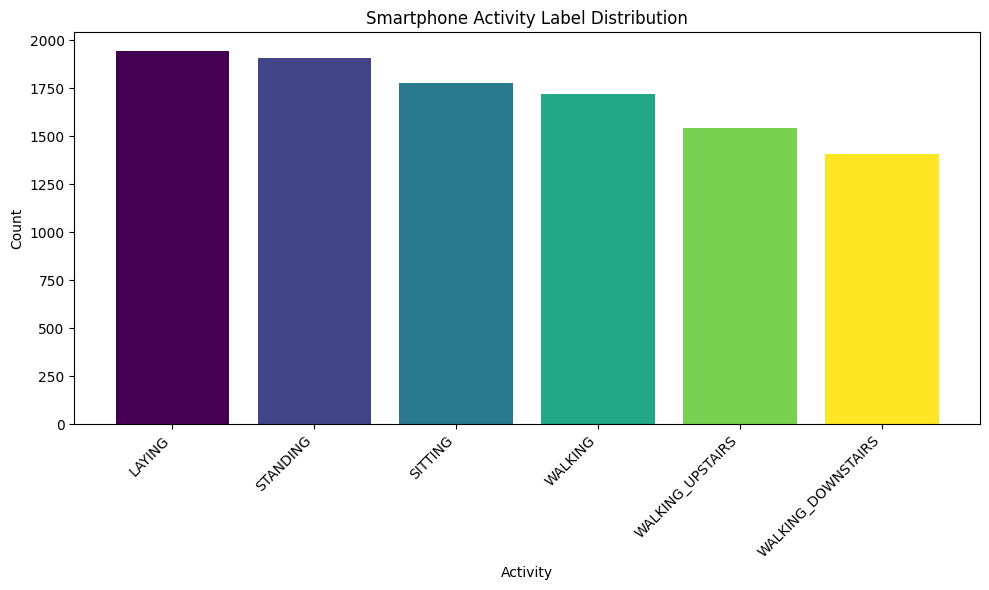

In [14]:
# Plotting data
label_counts = label.value_counts()

# Get colors (custom colormap)
n = label_counts.shape[0]
cmap = plt.cm.viridis  # Choose any matplotlib colormap
colors = cmap(np.arange(len(label_counts)) / (n - 1))  # Normalize for n colors

# Create plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
bars = plt.bar(label_counts.index, label_counts, color=colors)

# Customize plot elements
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Smartphone Activity Label Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing between elements

# Display plot
plt.show()

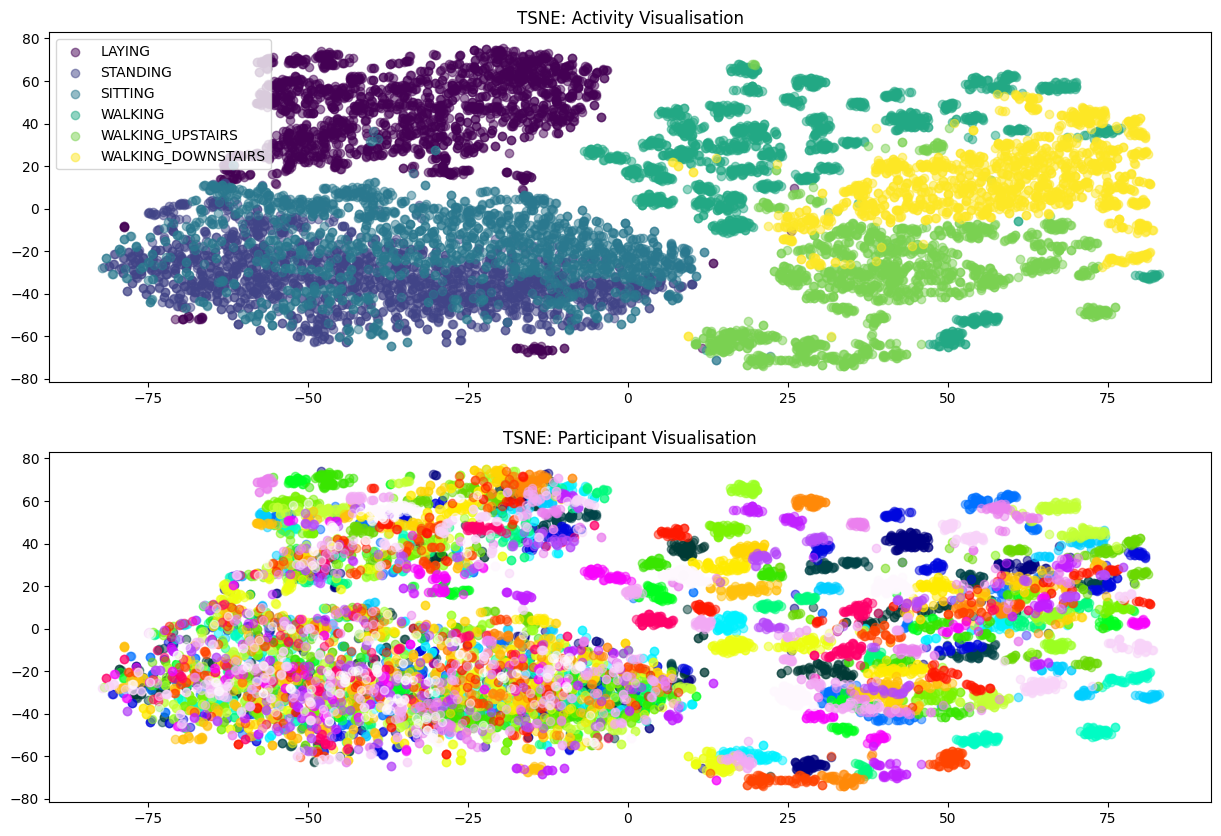

In [20]:
# Create datasets
tsne_data = both_df.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = plt.get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('TSNE: Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = plt.get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('TSNE: Participant Visualisation')
plt.show()

In [24]:
# Split training testing data
enc = LabelEncoder()
label_encoded = enc.fit_transform(label)
X_train, X_test, y_train, y_test = train_test_split(tsne_data, label_encoded, random_state=3)

# Create the model
lgbm = LGBMClassifier(n_estimators=500, random_state=3)
lgbm = lgbm.fit(X_train, y_train)

# Test the model
score = accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
print('Accuracy on testset:\t{:.4f}\n'.format(score))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16575
[LightGBM] [Info] Number of data points in the train set: 7724, number of used features: 65
[LightGBM] [Info] Start training from score -1.678301
[LightGBM] [Info] Start training from score -1.756150
[LightGBM] [Info] Start training from score -1.673459
[LightGBM] [Info] Start training from score -1.800602
[LightGBM] [Info] Start training from score -1.983237
[LightGBM] [Info] Start training from score -1.895912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [25]:
# Store the data
data = []
# Iterate over each activity
for activity in label_counts.index:
    # Create dataset
    act_data = both_df[label==activity].copy()
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
    # Scale data
    scl = StandardScaler()
    act_data = scl.fit_transform(act_data)

    # Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

    
    # Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train, X_test, y_train, y_test = train_test_split(act_data, label_encoded, random_state=3)


    # Fit basic model
    print('Activity: {}'.format(activity))
    lgbm = LGBMClassifier(n_estimators=500, random_state=3)
    lgbm = lgbm.fit(X_train, y_train)
    
    score = accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
    print('Accuracy on testset:\t{:.4f}\n'.format(score))
    data.append([activity, score])

Activity: LAYING
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14790
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 58
[LightGBM] [Info] Start training from score -3.701302
[LightGBM] [Info] Start training from score -3.456180
[LightGBM] [Info] Start training from score -3.547151
[LightGBM] [Info] Start training from score -3.372798
[LightGBM] [Info] Start training from score -3.701302
[LightGBM] [Info] Start training from score -3.571249
[LightGBM] [Info] Start training from score -3.277488
[LightGBM] [Info] Start training from score -3.207283
[LightGBM] [Info] Start training from score -3.333577
[LightGBM] [Info] Start training from score -3.372798
[LightGBM] [Info] Start training from score -3.095166
[LightGBM] [Info] Start training from score -3.547151
[LightGBM] [Info] Start training from score -3

### Reconstruindo UCI-HAR Dataset para o padrão do trabalho

In [8]:
# testando amostras do professor
df_train_prof = pd.read_csv('dataset/har-example-mo436/train.csv')
df_test_prof = pd.read_csv('dataset/har-example-mo436/test.csv')
df_val_prof = pd.read_csv('dataset/har-example-mo436/validation.csv')

df_train_prof.drop(columns=[df_train_prof.columns[0], 'gyro-end-time', 'level_0', 'accel-end-time', 'gyro-start-time', 'index', 'user', 'serial', 'accel-start-time', 'csv', 'timestamp diff', 'activity code', 'window'], inplace=True)
df_test_prof.drop(columns=[df_train_prof.columns[0], 'gyro-end-time', 'level_0', 'accel-end-time', 'gyro-start-time', 'index', 'user', 'serial', 'accel-start-time', 'csv', 'timestamp diff', 'activity code', 'window'], inplace=True)
df_val_prof.drop(columns=[df_train_prof.columns[0], 'gyro-end-time', 'level_0', 'accel-end-time', 'gyro-start-time', 'index', 'user', 'serial', 'accel-start-time', 'csv', 'timestamp diff', 'activity code', 'window'], inplace=True)

y_train_prof = df_train_prof.pop('standard activity code')
y_test_prof = df_test_prof.pop('standard activity code')
y_val_prof = df_val_prof.pop('standard activity code')

In [9]:
df_train_prof.head()

accel-x-0  accel-x-1  accel-x-2  accel-x-3  accel-x-4  accel-x-5  \
0   0.007964  -0.000341  -0.000917   0.013835   0.006055  -0.011637   
1   0.011350   0.000906  -0.017013   0.003416  -0.003677   0.003535   
2  -0.011174   0.013523  -0.012778  -0.002615   0.019870  -0.026563   
3   0.013647   0.025335   0.039625   0.032854   0.052418   0.019384   
4   0.003781   0.001663  -0.001938   0.011487   0.000006  -0.011932   

   accel-x-6  accel-x-7  accel-x-8  accel-x-9  ...  gyro-z-50  gyro-z-51  \
0   0.021686  -0.022201   0.006096  -0.001330  ...  -0.000271   0.000457   
1  -0.013919   0.000987  -0.003978  -0.005770  ...  -0.001686  -0.000034   
2  -0.001253  -0.012040   0.031816   0.011747  ...   0.000840   0.000356   
3   0.031342   0.014627   0.022141   0.052522  ...  -0.002883  -0.001394   
4   0.015477   0.009142  -0.002724   0.010272  ...  -0.000439   0.000336   

   gyro-z-52  gyro-z-53  gyro-z-54  gyro-z-55  gyro-z-56  gyro-z-57  \
0  -0.000645  -0.000263   0.001054  -0.000839   0.000174   0.001233   
1   0.000706   0.000902  -0.001349  -0.000159   0.001318  -0.002195   
2   0.000121  -0.000329  -0.000464  -0.000249  -0.000191   0.000912   
3  -0.004235  -0.004695  -0.004804  -0.004023   0.000290  -0.003753   
4  -0.001660  -0.002663  -0.003443  -0.004423   0.000016  -0.002292   

   gyro-z-58  gyro-z-59  
0   0.001154  -0.001453  
1  -0.000814  -0.003236  
2  -0.000152  -0.000361  
3  -0.001526  -0.001583  
4  -0.002319  -0.003021  

[5 rows x 360 columns]

In [34]:
accel_x_1 = df_train_prof.filter(like='accel-x').iloc[:, :30]
mean_accel_x_1 = accel_x_1.std(axis=1)
accel_x_2 = df_train_prof.filter(like='accel-x').iloc[:, 30:]
mean_accel_x_2 = accel_x_2.std(axis=1)

accel_y_1 = df_train_prof.filter(like='accel-y').iloc[:, :30]
mean_accel_y_1 = accel_y_1.std(axis=1)
accel_y_2 = df_train_prof.filter(like='accel-y').iloc[:, 30:]
mean_accel_y_2 = accel_y_2.std(axis=1)

accel_z_1 = df_train_prof.filter(like='accel-z').iloc[:, :30]
mean_accel_z_1 = accel_z_1.std(axis=1)
accel_z_2 = df_train_prof.filter(like='accel-z').iloc[:, 30:]
mean_accel_z_2 = accel_z_2.std(axis=1)

gyro_x_1 = df_train_prof.filter(like='gyro-x').iloc[:, :30]
mean_gyro_x_1 = gyro_x_1.std(axis=1)
gyro_x_2 = df_train_prof.filter(like='gyro-x').iloc[:, 30:]
mean_gyro_x_2 = gyro_x_2.std(axis=1)

gyro_y_1 = df_train_prof.filter(like='gyro-y').iloc[:, :30]
mean_gyro_y_1 = gyro_y_1.std(axis=1)
gyro_y_2 = df_train_prof.filter(like='gyro-y').iloc[:, 30:]
mean_gyro_y_2 = gyro_y_2.std(axis=1)

gyro_z_1 = df_train_prof.filter(like='gyro-z').iloc[:, :30]
mean_gyro_z_1 = gyro_z_1.std(axis=1)
gyro_z_2 = df_train_prof.filter(like='gyro-z').iloc[:, 30:]
mean_gyro_z_2 = gyro_z_2.std(axis=1)

new_df_train_prof = pd.DataFrame({
    'tBodyAcc-mean()-X': mean_accel_x_1,
    'tBodyAcc-mean()-Y': mean_accel_y_1,
    'tBodyAcc-mean()-Z': mean_accel_z_1,
    'tBodyAccJerk-mean()-X': mean_accel_x_2,
    'tBodyAccJerk-mean()-Y': mean_accel_y_2,
    'tBodyAccJerk-mean()-Z': mean_accel_z_2,

    'tBodyGyro-mean()-X': mean_gyro_x_1,
    'tBodyGyro-mean()-Y': mean_gyro_y_1,
    'tBodyGyro-mean()-Z': mean_gyro_z_1,
    'tBodyGyroJerk-mean()-X': mean_gyro_x_2,
    'tBodyGyroJerk-mean()-Y': mean_gyro_y_2,
    'tBodyGyroJerk-mean()-Z': mean_gyro_z_2,
})

new_df_train_prof.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0           0.009317           0.008093           0.010730   
1           0.007818           0.008098           0.013539   
2           0.015841           0.012495           0.012029   
3           0.022792           0.006334           0.023194   
4           0.013734           0.011481           0.010915   

   tBodyAccJerk-mean()-X  tBodyAccJerk-mean()-Y  tBodyAccJerk-mean()-Z  \
0               0.010909               0.007782               0.018032   
1               0.006595               0.007724               0.015053   
2               0.013563               0.007426               0.013327   
3               0.026221               0.006445               0.024728   
4               0.015474               0.014411               0.014117   

   tBodyGyro-mean()-X  tBodyGyro-mean()-Y  tBodyGyro-mean()-Z  \
0            0.000935            0.002331            0.000956   
1            0.000789            0.003396            0.001290   
2            0.001751            0.008546            0.001878   
3            0.002857            0.007181            0.001659   
4            0.001166            0.005273            0.001571   

   tBodyGyroJerk-mean()-X  tBodyGyroJerk-mean()-Y  tBodyGyroJerk-mean()-Z  
0                0.001568                0.007085                0.001353  
1                0.000859                0.002711                0.001229  
2                0.000652                0.004247                0.000864  
3                0.003174                0.014637                0.002960  
4                0.001307                0.005518                0.001988

In [42]:
colunas = [
    'tBodyAcc-std()-X',
    'tBodyAcc-std()-Y',
    'tBodyAcc-std()-Z',
    'tBodyAccJerk-std()-X',
    'tBodyAccJerk-std()-Y',
    'tBodyAccJerk-std()-Z',

    'tBodyGyro-std()-X',
    'tBodyGyro-std()-Y',
    'tBodyGyro-std()-Z',
    'tBodyGyroJerk-std()-X',
    'tBodyGyroJerk-std()-Y',
    'tBodyGyroJerk-std()-Z',
]
filtered = 1 + df_train[colunas]
print(filtered.shape)
filtered.head()

(5881, 12)


tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAccJerk-std()-X  \
0          0.005575          0.005127          0.005114              0.008060   
1          0.673669          1.069663          0.775679              0.468625   
2          0.973780          0.967837          1.393109              0.903519   
3          0.018908          0.098876          0.039577              0.019455   
4          0.002620          0.016107          0.015518              0.003121   

   tBodyAccJerk-std()-Y  tBodyAccJerk-std()-Z  tBodyGyro-std()-X  \
0              0.009435              0.007380           0.001028   
1              0.671985              0.422011           0.384725   
2              0.645618              0.321220           0.481074   
3              0.030547              0.017547           0.142876   
4              0.013488              0.008416           0.021789   

   tBodyGyro-std()-Y  tBodyGyro-std()-Z  tBodyGyroJerk-std()-X  \
0           0.005545           0.013844               0.001711   
1           0.494575           1.107848               0.460125   
2           1.179382           0.517480               0.479846   
3           0.065327           0.114990               0.037301   
4           0.012822           0.014064               0.007576   

   tBodyGyroJerk-std()-Y  tBodyGyroJerk-std()-Z  
0               0.002534               0.003119  
1               0.462317               0.461448  
2               0.295167               0.468197  
3               0.019316               0.026173  
4               0.006943               0.009620